In [1]:
import pandas as pd
import os
import math
%matplotlib inline

pot_do_receptov = os.path.join('obdelani-podatki', 'recepti.csv')
pot_do_sestavin = os.path.join('obdelani-podatki', 'sestavine.csv')

recepti = pd.read_csv(pot_do_receptov)
sestavine = pd.read_csv(pot_do_sestavin)

Poglejmo si podatke, ki jih imamo:

<span style="color:#1B2D5F">*Opomba: Za vegetarijanske recepte uporabljamo oznako Vegetarian, za ne-vegetarijanske pa 0.*</span>

In [2]:
recepti

,naslov,avtor,cas_priprave,cas_kuhanja,stevilo_ocenjevalcev,ocena,dieta,zvrst
0,"Bacon chop with hispi cabbage, lovage and a p...",Angela Hartnett,0-30,30-60,0,0.00,0,Main course
1,"Baked pasta shells stuffed with cheese, tomat...",Matt Tebbutt,0-30,30-60,1,5.00,Vegetarian,Main course
2,"Pan-fried red mullet, baked pink fir potato, ...",Bryn Williams,0-30,30-60,0,0.00,0,Main course
3,Rum and orange doughnuts with chocolate sauce...,Matt Tebbutt,0-30,10-30,0,0.00,0,Desserts
4,Slow-cooked ox cheek with kale and mashed potato,Freddy Bird,30-60,00-120,5,5.00,0,Recipe
...,...,...,...,...,...,...,...,...
9600,Îles flottantes,Rachel Khoo,00-120,10-30,1,4.00,Vegetarian,Desserts
9601,‘Chocolate orange’ iced biscuits,Warwick Davis,0-30,10-30,1,5.00,Vegetarian,Cakes and baking
9602,‘Dirty’ veggie starter platter,Joe Florek,0-30,10-30,1,5.00,Vegetarian,Starters and nibbles
9603,‘I can’t believe you made that’ cake,Lorraine Pascale,30-60,30-60,4,4.75,Vegetarian,Cakes and baking


In [3]:
sestavine

,recept,sestavina
0,"Bacon chop with hispi cabbage, lovage and a p...",bacon
1,"Bacon chop with hispi cabbage, lovage and a p...",butter
2,"Bacon chop with hispi cabbage, lovage and a p...",plain flour
3,"Bacon chop with hispi cabbage, lovage and a p...",onion
4,"Bacon chop with hispi cabbage, lovage and a p...",apple
...,...,...
225352,‘Nduja and mozzarella pizza,yeast
225353,‘Nduja and mozzarella pizza,semolina
225354,‘Nduja and mozzarella pizza,vegetable oil
225355,‘Nduja and mozzarella pizza,tomatoe


# Hipoteze

### 1.  Vegetarijanski recepti so slabše ocenjeni

Vidimo lahko, da je okoli 45% receptov vegetarijanskih,

In [4]:
recepti.groupby('dieta').size()

dieta
0             5529
Vegetarian    4076
dtype: int64

ampak je kjub temu vegetarijanske recepte ocenilo približno 10% več ocenjevalcev kot tiste, ki niso imeli vegetarijanske oznake:

- *Število ocenjevalcev vegetarijanskih receptov:*

In [5]:
ocenjevalci_vege = recepti[recepti.dieta == "Vegetarian"].stevilo_ocenjevalcev.sum()
ocenjevalci_vege

25398

- *Število ocenjevalcev receptov, ki niso imeli vegetarijanske oznake:*

In [6]:
ocenjevalci_ne_vege = recepti[recepti.dieta == '0'].stevilo_ocenjevalcev.sum()
ocenjevalci_ne_vege

20198

Oseba, ki je le vegetarijansko hrano, ne bo pripravljala mesne hrane, medtem ko oseba, ki je tudi meso, bo občasno pripravila vegetarijansko jed. S tem lahko razložimo razliko v številu ocenjevalcev.

Receptom dodamo stolpec `zaokrozene_ocene`, da bo graf preglednejši...

In [7]:
zaokrozene_ocene = recepti.ocena.round()
recepti['zaokrozene_ocene'] = zaokrozene_ocene
recepti

,naslov,avtor,cas_priprave,cas_kuhanja,stevilo_ocenjevalcev,ocena,dieta,zvrst,zaokrozene_ocene
0,"Bacon chop with hispi cabbage, lovage and a p...",Angela Hartnett,0-30,30-60,0,0.00,0,Main course,0.0
1,"Baked pasta shells stuffed with cheese, tomat...",Matt Tebbutt,0-30,30-60,1,5.00,Vegetarian,Main course,5.0
2,"Pan-fried red mullet, baked pink fir potato, ...",Bryn Williams,0-30,30-60,0,0.00,0,Main course,0.0
3,Rum and orange doughnuts with chocolate sauce...,Matt Tebbutt,0-30,10-30,0,0.00,0,Desserts,0.0
4,Slow-cooked ox cheek with kale and mashed potato,Freddy Bird,30-60,00-120,5,5.00,0,Recipe,5.0
...,...,...,...,...,...,...,...,...,...
9600,Îles flottantes,Rachel Khoo,00-120,10-30,1,4.00,Vegetarian,Desserts,4.0
9601,‘Chocolate orange’ iced biscuits,Warwick Davis,0-30,10-30,1,5.00,Vegetarian,Cakes and baking,5.0
9602,‘Dirty’ veggie starter platter,Joe Florek,0-30,10-30,1,5.00,Vegetarian,Starters and nibbles,5.0
9603,‘I can’t believe you made that’ cake,Lorraine Pascale,30-60,30-60,4,4.75,Vegetarian,Cakes and baking,5.0


... in izločimo recepte, ki niso bili ocenjeni.

In [8]:
najmanj_en_ocenjevalec = recepti[recepti.stevilo_ocenjevalcev > 0]
najmanj_en_ocenjevalec

,naslov,avtor,cas_priprave,cas_kuhanja,stevilo_ocenjevalcev,ocena,dieta,zvrst,zaokrozene_ocene
1,"Baked pasta shells stuffed with cheese, tomat...",Matt Tebbutt,0-30,30-60,1,5.00,Vegetarian,Main course,5.0
4,Slow-cooked ox cheek with kale and mashed potato,Freddy Bird,30-60,00-120,5,5.00,0,Recipe,5.0
6,Thai massaman dal,Lucy Parker,0-30,30-60,10,4.70,Vegetarian,Main course,5.0
7,Torta pasqualina (Giant green pie),Donal Skehan,0-30,30-60,1,5.00,Vegetarian,Main course,5.0
8,'Butter' tofu curry,Sophie Whitbread,0-30,30-60,2,5.00,Vegetarian,Main course,5.0
...,...,...,...,...,...,...,...,...,...
9600,Îles flottantes,Rachel Khoo,00-120,10-30,1,4.00,Vegetarian,Desserts,4.0
9601,‘Chocolate orange’ iced biscuits,Warwick Davis,0-30,10-30,1,5.00,Vegetarian,Cakes and baking,5.0
9602,‘Dirty’ veggie starter platter,Joe Florek,0-30,10-30,1,5.00,Vegetarian,Starters and nibbles,5.0
9603,‘I can’t believe you made that’ cake,Lorraine Pascale,30-60,30-60,4,4.75,Vegetarian,Cakes and baking,5.0


*Graf zaokroženih ocen:* 

<AxesSubplot:xlabel='zaokrozene_ocene'>

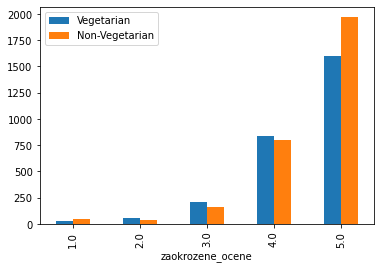

In [9]:
ocene_v = najmanj_en_ocenjevalec[najmanj_en_ocenjevalec.dieta == 'Vegetarian'].groupby('zaokrozene_ocene').size()
ocene_m = najmanj_en_ocenjevalec[najmanj_en_ocenjevalec.dieta == '0'].groupby('zaokrozene_ocene').size()
pd.DataFrame({
    'Vegetarian': ocene_v,
    'Non-Vegetarian': ocene_m
}).plot.bar()

In [10]:
def izracunaj_povp_oceno(dieta):
    d = recepti.dieta == dieta
    o = recepti.ocena > 0.00
    data = {'ocena': [], 'st': []}
    for ocena in recepti[d & o].groupby('ocena'):
        data['ocena'].append(ocena[0])
    for st in recepti[d & o].groupby('ocena').size():
        data['st'].append(st)
    imenovalec = 0
    stevec = 0
    for i in range(len(recepti[d & o].groupby('ocena'))):
        imenovalec += data['st'][i]
        stevec += data['st'][i] * data['ocena'][i]
    return round(stevec / imenovalec, 2)

*Povprečna ocena vegetarijanskih receptov:*

In [11]:
izracunaj_povp_oceno('Vegetarian')

4.43

*Povprečna ocena ne-vegetarijanskih receptov:*

In [12]:
izracunaj_povp_oceno('0')

4.52

**Zaključek**  
Vegetarijanskih receptov je manj, ocenilo jih je več oseb, iz česar bi lahko sklepali, da nižja ocena morda pomeni le bolj realno sliko. Druga razlaga za nižjo oceno je, da nekomu, ki je meso, vegetarijanski obrok morda ni tako teknil. S tem potrjujem svojo hipotezo.

### 2. Ali obstaja povezava med avtorjem in časom kuhanja njegovih receptov?
##### (če ima kuhar vsaj 10 receptov)

Rekli bomo, da ima avtor povezavo z dolžino kuhanja svojih receptov, če bo vsaj polovica njegovih receptov imela enak čas.

In [13]:
data = {'avtor': [], 'stevilo_receptov' : [], 'bool': []}
for avtor in recepti.groupby('avtor'):
    data['avtor'].append(avtor[0])
    data['stevilo_receptov'].append(recepti[recepti.avtor == avtor[0]].groupby('avtor').size().sum())
avtor_mask = recepti.groupby('avtor').size() >= 10
for bol in avtor_mask:
    data['bool'].append(bol)
avtorji = pd.DataFrame(data, columns = ['avtor', 'stevilo_receptov', 'bool'])
avtorji_z_veliko_recepti = avtorji[avtorji['bool'] == True].drop(columns='bool')

Seznam vseh avtorjev, ki imajo več kot 10 receptov:

In [14]:
avtorji_z_veliko_recepti

,avtor,stevilo_receptov
3,Adam Byatt,11
11,Ainsley Harriott,15
16,Aldo Zilli,12
17,Alex Mackay,13
23,Allegra McEvedy,30
...,...,...
651,Valentine Warner,45
655,Vivek Singh,28
659,Wayne Collins,19
662,William Leigh,10


Definiramo funkcijo, ki vrne `DataFrame`, v katerem avtorje vežemo na resničnostno vrednost, ki pove ali ima vsaj `1/n` avtorjevih receptov enak čas kuhanja.  

In [32]:
def povezava_za(n):
    data = {'avtor' : [], 'bool' : [], 'najpogostejsi_cas' : []}
    for avtor in avtorji_z_veliko_recepti.avtor:
        data['avtor'].append(avtor)
        slovar_casov = {}
        for cas in recepti[recepti.avtor == avtor].cas_kuhanja:
            if cas in slovar_casov:
                slovar_casov[cas] += 1
            else:
                slovar_casov[cas] = 1
        najpogostejsi_cas = max(slovar_casov, key=slovar_casov.get)
        data['najpogostejsi_cas'].append(najpogostejsi_cas)
        stevilo_receptov = avtorji_z_veliko_recepti[avtorji_z_veliko_recepti.avtor == avtor].stevilo_receptov.sum()
        if math.ceil(stevilo_receptov / n) <= slovar_casov[najpogostejsi_cas]:
            data['bool'].append(True)
        else:
            data['bool'].append(False)
    return pd.DataFrame(data, columns = ['avtor', 'bool', 'najpogostejsi_cas'])

In [34]:
st_receptov_mask = povezava_za(2)
st_receptov_mask.groupby('bool').size()

bool
False    92
True     53
dtype: int64

Kot lahko vidimo, ima okoli 60% avtorjev manj kot polovico svojih receptov z enakim časom kuhanja. Kakorkoli že, če namesto polovice receptov gledamo tretjino, smo 'slabe' avtorje spravili pod 10%.

In [35]:
st_receptov_mask = povezava_za(3)
st_receptov_mask.groupby('bool').size()

bool
False     14
True     131
dtype: int64

*Graf časov kuhanja:* 

<AxesSubplot:xlabel='najpogostejsi_cas'>

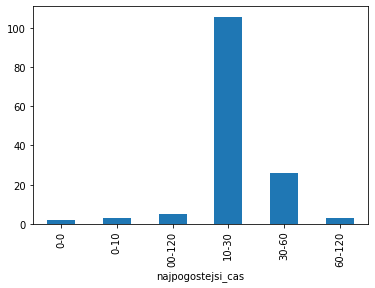

In [18]:
st_receptov_mask.groupby('najpogostejsi_cas').size().plot.bar()

**Zaključek**  
Pri receptih se avtorji ne ozirajo na čas kuhanja. Iz zgornjega grafa je razvidno, da je večini kuharjev ljubši čas kuhanja med 10 in 30 minut. Kar je seveda smiselno, saj imajo v današnjem času ljudje raje hitro in doma pripravljeno hrano.

### 3. Najpogosteje uporabljene sestavine so sol, poper, olje in čebula.

Te sestavine so najpogosteje uporabljene:

<AxesSubplot:xlabel='sestavina'>

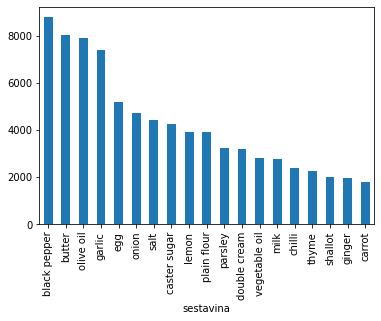

In [28]:
ocenjevalci_in_sestavine = pd.merge(recepti, sestavine, left_on='naslov', right_on='recept')
urejene_sestavine = ocenjevalci_in_sestavine.groupby('sestavina').count().sort_values(['naslov'], ascending=False).naslov
urejene_sestavine.head(19).plot.bar()

Kot zanimivost, si oglejmo še 15 najbolj uporabljenih sestavin glede na vrsto jedi:

In [30]:
def urejene_sestavine_po_zvrsti(zvrst):
    z = recepti[recepti.zvrst == zvrst]
    urejena_z = pd.merge(z, sestavine, left_on='naslov', right_on='recept').groupby('sestavina').count().sort_values(['naslov'], ascending=False).naslov
    podatki = urejena_z.head(15)
    return podatki

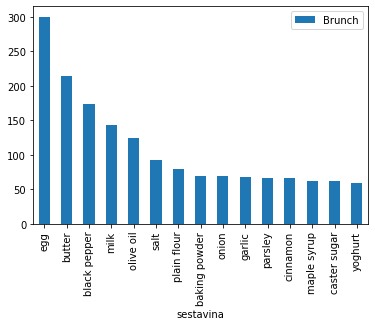

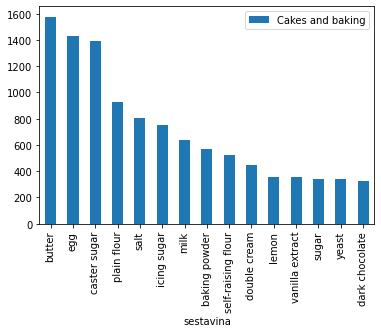

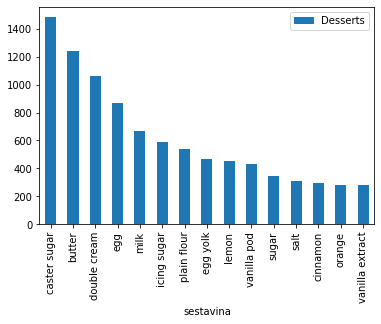

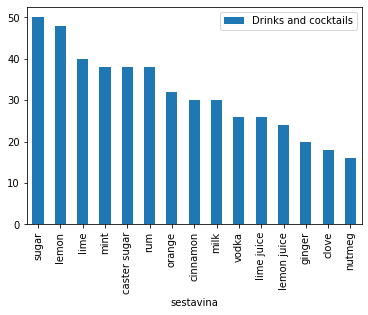

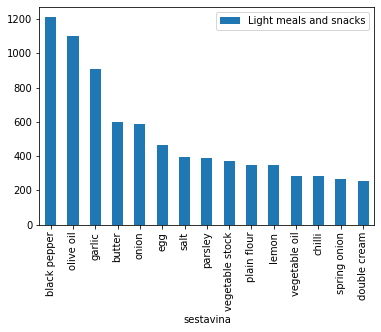

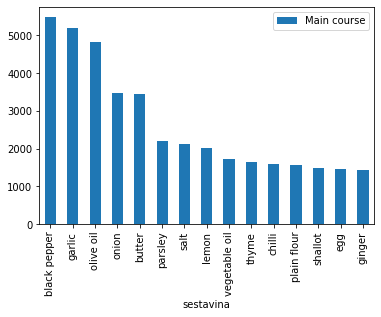

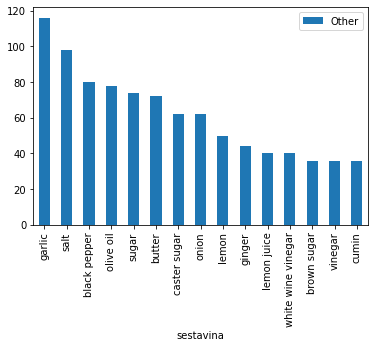

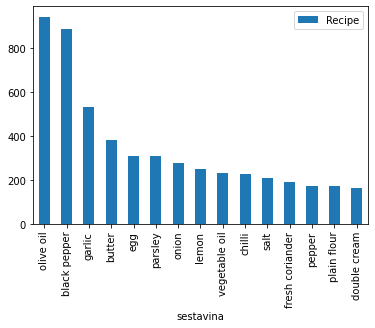

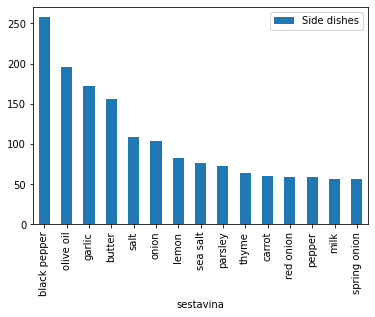

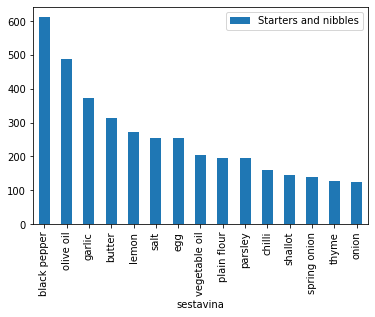

In [31]:
data = {}
for podatek_o_zvrsti in recepti.groupby('zvrst'):
    zvrst = podatek_o_zvrsti[0]
    graf = urejene_sestavine_po_zvrsti(zvrst)
    data[zvrst] = graf
    pd.DataFrame(data).plot.bar()
    data = {}

**Zaključek**  
Najpogosteje uporabljene sestavine so poper, maslo in olje. Hipoteza se razlikuje od realnosti, ker so recepti zbrani iz britanske spletne strani. Njihova kulinarika pogosteje posega po maslu in česnu, kot po soli in čebuli, kar je značilnejše za naše kraje.